In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Carregar o arquivo CSV
data = pd.read_parquet("../../dados/rotas_aereas/data.parquet")
data = data.dropna()

# Exibir as primeiras linhas do conjunto de dados
data = data.sample(frac=0.05, random_state=42)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60843 entries, 883679 to 2617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype                            
---  ------     --------------  -----                            
 0   indicat    60843 non-null  float64                          
 1   time       60843 non-null  datetime64[ns, America/Sao_Paulo]
 2   unix       60843 non-null  float64                          
 3   lat        60843 non-null  float64                          
 4   lon        60843 non-null  float64                          
 5   alt        60843 non-null  float64                          
 6   head       60843 non-null  float64                          
 7   speed      60843 non-null  float64                          
 8   equip      60843 non-null  category                         
 9   regist     60843 non-null  category                         
 10  orig       60843 non-null  category                         
 11  dest       60843 non-null  ca

In [5]:
# Verificar a quantidade de categorias únicas em cada coluna categórica
data.select_dtypes(include=['category']).nunique()

equip        14
regist      275
orig          9
dest          9
id_iata     805
id_icao    1009
code1       275
dtype: int64

In [8]:
# Selecionar colunas numéricas
numeric_df = data.select_dtypes(include=['float64', 'int64']).drop(columns=['unix'])

# Codificação one-hot para colunas categóricas selecionadas
encoded_df = pd.get_dummies(data[['orig', 'dest', 'equip']], drop_first=True)

# Combinar os conjuntos de dados
combined_df = pd.concat([numeric_df, encoded_df], axis=1)

combined_df.head()


,indicat,lat,lon,alt,head,speed,Distance1,Distance2,orig_AEP,orig_AJU,...,equip_M11,equip_E200,equip_T34P,equip_ZZZZ,equip_B427,equip_COL3,equip_ERCO,equip_FA20,equip_T204,equip_CRJ9
883679,10746.0,-24.173100,-46.373700,21775.000000,28.000000,422.000000,433.841791,44.667557,False,False,...,False,False,False,False,False,False,False,False,False,False
671834,8877.0,-13.235800,-38.953600,31000.000000,36.000000,500.000000,747.840645,388.538366,False,False,...,False,False,False,False,False,False,False,False,False,False
904080,10920.0,-23.393814,-46.529809,6024.779758,173.278163,230.779631,1135.590787,5.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
294085,3613.0,-23.638000,-46.355900,11250.000000,73.000000,327.000000,16.562442,181.671636,False,False,...,False,False,False,False,False,False,False,False,False,False
680127,8928.0,-14.763200,-40.161000,39000.000000,33.000000,497.000000,632.388613,504.231990,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Normalizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)

# Aplicar PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calcular a variância explicada cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [14]:
combined_df.sample(2)

,indicat,lat,lon,alt,head,speed,Distance1,Distance2,orig_AEP,orig_AJU,...,equip_M11,equip_E200,equip_T34P,equip_ZZZZ,equip_B427,equip_COL3,equip_ERCO,equip_FA20,equip_T204,equip_CRJ9
1010981,11472.0,-14.1910,-39.2526,33975.0,219.0,447.0,444.982196,690.667974,False,False,...,False,False,False,False,False,False,False,False,False,False
224817,2619.0,-28.6443,-50.3377,32000.0,209.0,427.0,361.106714,92.131027,False,False,...,False,False,False,False,False,False,False,False,False,False


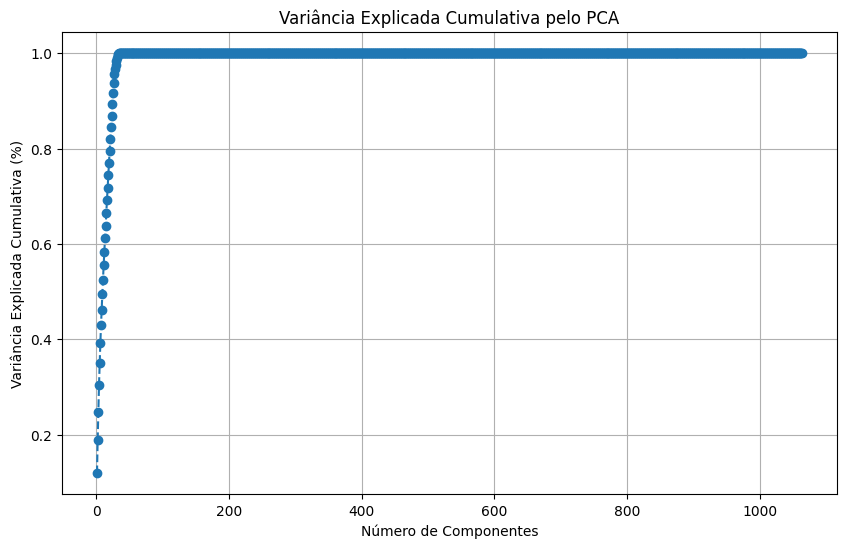

In [10]:
import matplotlib.pyplot as plt

# Plotar a variância explicada cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Cumulativa pelo PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa (%)')
plt.grid(True)
plt.show()

In [13]:
# find how many to 90%
n_components = np.argmax(cumulative_variance > 0.9) + 1
print(n_components)

25


In [18]:
# Aplicar PCA para 10 componentes
pca_ = PCA(n_components=n_components)
reduced_data = pca_.fit_transform(scaled_data)

# Convertendo os resultados em um DataFrame para visualização
df_pca_ = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(n_components)])

df_pca_.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.361516,1.104907,-1.456080,-1.547871,-1.210420,-0.330210,2.347762,0.437259,-0.270923,-0.365139,...,0.322545,0.659738,-0.343154,-2.581744,0.205285,0.311542,0.122337,-0.570261,1.192117,1.262469
1,4.211156,-2.422501,-0.307824,2.399430,0.604682,-0.017188,0.264087,2.667108,0.151833,-0.354820,...,-2.028833,2.060323,-5.690611,0.336055,7.128290,-1.433124,-1.725060,-1.433602,-0.548811,-1.481031
2,1.975624,1.601154,1.306289,-0.988763,-1.541702,1.256729,-0.852669,1.533243,-0.191606,-1.960254,...,0.608705,-0.941098,-1.604349,0.832832,-0.441399,-0.162285,0.127424,0.508827,-0.442584,1.037175
3,-2.070196,-1.662151,1.519268,0.143834,-1.167083,-1.549840,1.616842,0.304141,0.060907,-0.488234,...,-0.044399,0.266536,0.544944,0.042168,0.395122,0.134814,-0.191899,-0.351120,0.273073,-0.021343
4,4.027331,-2.320470,-0.728243,1.918576,0.401337,-0.408001,0.138912,1.646678,0.824455,0.044063,...,0.053733,-0.063733,2.358608,-0.309715,-0.377525,-0.461132,0.261167,-0.121995,-0.141617,-0.366785
